In [ ]:
# instalamos librería pca
!pip install -q pca
!pip install --upgrade plotly --q

# Tratamiento de datos
# ==============================================================================
import pandas as pd
from pandas.plotting import table
import numpy as np
import statsmodels.api as sm
import sklearn
import six
import ftplib
import os
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import date2num, num2date
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib import animation
plt.style.use("ggplot")# for pretty graphs
from IPython.display import clear_output
import plotly.express as px
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import k_means
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Configuración warnings
# ==============================================================================
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = 'https://storage.googleapis.com/covid19-open-data/v2/weather.csv'
archivo1 = pd.read_csv(path, sep=",")

archivo1.head(5)

,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,2020-01-01,AD,08117099999,39.866801,5.233333,1.511111,9.166667,2.4765,NaN,0.177778,72.967738
1,2020-01-01,AE,41216099999,16.303110,21.261111,16.216667,26.083333,0.0000,NaN,11.555556,54.350613
2,2020-01-01,AF,40942099999,90.343387,5.027778,0.444444,9.555556,0.0000,NaN,-4.083333,55.903534
3,2020-01-01,AF_BAL,40911099999,8.359524,5.930556,0.798611,8.930556,0.0000,NaN,1.722222,74.572882
4,2020-01-01,AF_BAM,40948099999,180.669856,2.788889,-0.322222,5.988889,0.0000,NaN,-1.311111,75.079524


In [ ]:
#Instalar Librería para leer el objeto R
!pip install pyreadr --q

In [ ]:
import pyreadr # librería para leer archivos generados con R
from urllib.request import urlopen # Necesario para leer el archivo RData con información Covid

In [ ]:
import pyreadr # librería para leer archivos generados con R
from urllib.request import urlopen # Necesario para leer el archivo RData con información Covid

#Leemos el archivo RData de datos Covid-19 desde el Github de Ruben F. Casal
url="https://github.com/rubenfcasal/COVID-19/blob/master/acumula2.RData?raw=true"
archivo = urlopen(url)
contenido = archivo.read()
fhandle = open( 'acumula2.RData', 'wb')
fhandle.write(contenido)
fhandle.close()
resultado = pyreadr.read_r("acumula2.RData")

# Convertimos el archivo R a Dataframe Pandas
print(resultado.keys()) # Validamos los objetos que obtenemos de los datos R que serán la base del DataFrame
df_covid = resultado["acumula2"] # Extracción de la información del objeto R hacia Pandas DataFrame
type(df_covid) # Validamos el dipo de objeto generado para confirmar que tenemos nuestro PD DataFrame

df_covid.head(20)

odict_keys(['acumula2'])


,fecha,iso,ccaa,confirmados,hospitalizados,uci,fallecidos
0,2020-01-01,ES,España,0,8,0,0
1,2020-01-01,AN,Andalucía,0,3,0,0
2,2020-01-01,AR,Aragón,0,0,0,0
3,2020-01-01,AS,Asturias,0,0,0,0
4,2020-01-01,CN,Canarias,0,0,0,0
5,2020-01-01,CB,Cantabria,0,0,0,0
6,2020-01-01,CL,Castilla y León,0,0,0,0
7,2020-01-01,CM,Castilla-La Mancha,0,0,0,0
8,2020-01-01,CT,Cataluña,0,1,0,0
9,2020-01-01,EA,Ceuta y Melilla,0,0,0,0


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   fecha           12200 non-null  object  
 1   iso             11590 non-null  category
 2   ccaa            12200 non-null  category
 3   confirmados     12200 non-null  int32   
 4   hospitalizados  12200 non-null  int32   
 5   uci             12200 non-null  int32   
 6   fallecidos      12200 non-null  int32   
dtypes: category(2), int32(4), object(1)
memory usage: 311.4+ KB


In [ ]:
#FILTRAMOS POR VALORES DE ESPAÑA
df_clima_es = archivo1[archivo1.key.str[:3] == 'ES_']
df_clima_es.head()

,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8646,2020-01-01,ES_AN,08419099999,45.345976,8.402778,2.812500,16.409722,0.00000,NaN,4.562500,76.986560
8647,2020-01-01,ES_AR,08233099999,26.275638,1.097222,-1.854167,7.493056,0.00000,NaN,-1.571429,83.099552
8648,2020-01-01,ES_AS,08015099999,10.917524,4.319444,0.270833,10.152778,0.03175,NaN,2.381944,87.497387
8649,2020-01-01,ES_CB,08021099999,17.896943,4.141975,-0.388889,10.333333,0.00000,NaN,1.567901,83.792949
8650,2020-01-01,ES_CE,60320099999,5.628310,13.672840,10.117284,17.611111,0.00000,NaN,9.049383,73.775605


In [ ]:
df_clima_es_1 = df_clima_es[df_clima_es['key'].str.len() <= 5]

In [ ]:
#AJUSTAMOS LAS KEYS PARA QUE CONTENGAN EL NOMBRE DE LA COMUNIDAD AUTÓNOMA
df_clima_es_1.loc[df_clima_es_1.key == "ES_AN", "key"] = "Andalucía"
df_clima_es_1.loc[df_clima_es_1.key == "ES_AR", "key"] = "Aragón"
df_clima_es_1.loc[df_clima_es_1.key == "ES_AS", "key"] = "Asturias"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CB", "key"] = "Cantabria"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CE", "key"] = "Ceuta y Melilla"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CL", "key"] = "Castilla y León"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CM", "key"] = "Castilla-La Mancha"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CN", "key"] = "Canarias"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CT", "key"] = "Cataluña"
df_clima_es_1.loc[df_clima_es_1.key == "ES_EX", "key"] = "Extremadura"
df_clima_es_1.loc[df_clima_es_1.key == "ES_GA", "key"] = "Galicia"
df_clima_es_1.loc[df_clima_es_1.key == "ES_IB", "key"] = "Islas Baleares"
df_clima_es_1.loc[df_clima_es_1.key == "ES_MC", "key"] = "Murcia"
df_clima_es_1.loc[df_clima_es_1.key == "ES_MD", "key"] = "Madrid"
df_clima_es_1.loc[df_clima_es_1.key == "ES_ML", "key"] = "Ceuta y Melilla"
df_clima_es_1.loc[df_clima_es_1.key == "ES_NC", "key"] = "Navarra"
df_clima_es_1.loc[df_clima_es_1.key == "ES_PV", "key"] = "País Vasco"
df_clima_es_1.loc[df_clima_es_1.key == "ES_RI", "key"] = "La Rioja"
df_clima_es_1.loc[df_clima_es_1.key == "ES_VC", "key"] = "Comunidad Valenciana"

df_clima_es_1.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8646,2020-01-01,Andalucía,08419099999,45.345976,8.402778,2.812500,16.409722,0.000000,NaN,4.562500,76.986560
8647,2020-01-01,Aragón,08233099999,26.275638,1.097222,-1.854167,7.493056,0.000000,NaN,-1.571429,83.099552
8648,2020-01-01,Asturias,08015099999,10.917524,4.319444,0.270833,10.152778,0.031750,NaN,2.381944,87.497387
8649,2020-01-01,Cantabria,08021099999,17.896943,4.141975,-0.388889,10.333333,0.000000,NaN,1.567901,83.792949
8650,2020-01-01,Ceuta y Melilla,60320099999,5.628310,13.672840,10.117284,17.611111,0.000000,NaN,9.049383,73.775605
8651,2020-01-01,Castilla y León,08141099999,37.358106,3.227778,-0.927778,11.500000,0.000000,NaN,-3.116667,71.034165
8652,2020-01-01,Castilla-La Mancha,08231099999,97.311812,3.955556,-0.761111,11.166667,0.000000,NaN,1.567901,86.483125
8653,2020-01-01,Canarias,60020099999,49.901717,16.627778,13.388889,19.466667,0.000000,NaN,3.844444,45.436329
8746,2020-01-01,Cataluña,08186099999,49.496159,5.409722,2.111111,9.722222,1.415143,NaN,1.520833,78.354407
9830,2020-01-01,Extremadura,08261099999,33.613475,6.166667,2.061728,12.462963,0.000000,NaN,3.006173,84.435759


In [ ]:
#PASAMOS NAs A 0
df_clima_total = df_clima_es_1.fillna(0)
df_clima_total.head(5)

,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8646,2020-01-01,Andalucía,08419099999,45.345976,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560
8647,2020-01-01,Aragón,08233099999,26.275638,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552
8648,2020-01-01,Asturias,08015099999,10.917524,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387
8649,2020-01-01,Cantabria,08021099999,17.896943,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949
8650,2020-01-01,Ceuta y Melilla,60320099999,5.628310,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605


In [ ]:
#ELIMINAMOS 2 VARIABLES PARA ANÁLISIS
df_clima_final = df_clima_total.drop(columns=['noaa_station','noaa_distance'])
df_clima_final.head(5)

,date,key,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8646,2020-01-01,Andalucía,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560
8647,2020-01-01,Aragón,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552
8648,2020-01-01,Asturias,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387
8649,2020-01-01,Cantabria,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949
8650,2020-01-01,Ceuta y Melilla,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605


In [ ]:
df_clima_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11615 entries, 8646 to 13206925
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 11615 non-null  object 
 1   key                  11615 non-null  object 
 2   average_temperature  11615 non-null  float64
 3   minimum_temperature  11615 non-null  float64
 4   maximum_temperature  11615 non-null  float64
 5   rainfall             11615 non-null  float64
 6   snowfall             11615 non-null  float64
 7   dew_point            11615 non-null  float64
 8   relative_humidity    11615 non-null  float64
dtypes: float64(7), object(2)
memory usage: 907.4+ KB


In [ ]:
df_clima_final['date'] = pd.to_datetime(df_clima_final['date'])
df_covid['fecha'] = pd.to_datetime(df_covid['fecha'])

In [ ]:
#UNIMOS AMBOS DATAFRAMES
df_final1 = pd.merge(df_clima_final, df_covid, how = 'left', left_on=['key','date'], right_on=['ccaa','fecha'])
df_final1.head(5)

,date,key,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,iso,ccaa,confirmados,hospitalizados,uci,fallecidos
0,2020-01-01,Andalucía,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,2020-01-01,AN,Andalucía,0.0,3.0,0.0,0.0
1,2020-01-01,Aragón,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,2020-01-01,AR,Aragón,0.0,0.0,0.0,0.0
2,2020-01-01,Asturias,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,2020-01-01,AS,Asturias,0.0,0.0,0.0,0.0
3,2020-01-01,Cantabria,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949,2020-01-01,CB,Cantabria,0.0,0.0,0.0,0.0
4,2020-01-01,Ceuta y Melilla,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605,2020-01-01,EA,Ceuta y Melilla,0.0,0.0,0.0,0.0


In [ ]:
df_final = df_final1.loc[df_final1['date'] <='2021-09-01']

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11558 entries, 0 to 11557
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 11558 non-null  datetime64[ns]
 1   key                  11558 non-null  object        
 2   average_temperature  11558 non-null  float64       
 3   minimum_temperature  11558 non-null  float64       
 4   maximum_temperature  11558 non-null  float64       
 5   rainfall             11558 non-null  float64       
 6   snowfall             11558 non-null  float64       
 7   dew_point            11558 non-null  float64       
 8   relative_humidity    11558 non-null  float64       
 9   fecha                11558 non-null  datetime64[ns]
 10  iso                  11558 non-null  category      
 11  ccaa                 11558 non-null  category      
 12  confirmados          11558 non-null  float64       
 13  hospitalizados       11558 non-

In [ ]:
df_final.isnull().sum()

date                   0
key                    0
average_temperature    0
minimum_temperature    0
maximum_temperature    0
rainfall               0
snowfall               0
dew_point              0
relative_humidity      0
fecha                  0
iso                    0
ccaa                   0
confirmados            0
hospitalizados         0
uci                    0
fallecidos             0
dtype: int64

In [ ]:
df_final.describe()

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados,hospitalizados,uci,fallecidos
count,11558.000000,11558.000000,11558.000000,11558.000000,11558.000000,11558.000000,11558.000000,11558.000000,11558.000000,11558.000000,11558.000000
mean,15.924659,10.857545,21.321729,1.682509,5.023192,9.118041,67.006705,91319.576051,10652.815712,964.722097,2405.116629
std,6.566526,6.012150,7.309613,3.941334,37.165679,5.013482,14.285959,161417.595062,17627.916125,1429.892331,3552.728216
min,-4.432099,-11.141975,-1.648148,0.000000,0.000000,-8.185185,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.987654,6.416667,15.993981,0.000000,0.000000,5.833333,58.825235,3481.750000,1012.250000,113.000000,204.000000
50%,15.570436,10.807099,20.654321,0.050800,0.000000,9.256250,68.974508,24183.500000,4313.500000,446.000000,808.000000
75%,20.944444,15.394908,26.868056,1.340303,0.000000,12.694444,77.476539,94835.750000,11718.500000,1173.000000,2904.750000
max,34.475309,27.604938,43.191358,51.110444,909.320000,22.993827,98.902001,889103.000000,109279.000000,8339.000000,15919.000000


In [ ]:
df_final_1 = df_final.drop(columns=['iso','key','date'])
df_final_1.head(5)

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,2020-01-01,Andalucía,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,2020-01-01,Aragón,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,2020-01-01,Asturias,0.0,0.0,0.0,0.0
3,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949,2020-01-01,Cantabria,0.0,0.0,0.0,0.0
4,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605,2020-01-01,Ceuta y Melilla,0.0,0.0,0.0,0.0


In [ ]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11558 entries, 0 to 11557
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   average_temperature  11558 non-null  float64       
 1   minimum_temperature  11558 non-null  float64       
 2   maximum_temperature  11558 non-null  float64       
 3   rainfall             11558 non-null  float64       
 4   snowfall             11558 non-null  float64       
 5   dew_point            11558 non-null  float64       
 6   relative_humidity    11558 non-null  float64       
 7   fecha                11558 non-null  datetime64[ns]
 8   ccaa                 11558 non-null  category      
 9   confirmados          11558 non-null  float64       
 10  hospitalizados       11558 non-null  float64       
 11  uci                  11558 non-null  float64       
 12  fallecidos           11558 non-null  float64       
dtypes: category(1), datetime64[ns](

In [ ]:
#PASAMOS A FORMATO NUMÉRICO LAS VARIABLES QUE NO LO SON ('CCAA' y 'fecha')
from datetime import datetime 

## ccaa
df_final_1['ccaa'] = df_final_1['ccaa'].cat.codes
df_final_1['fecha'] =  nueva_fecha1
df_final_1.info()
df_final_1.head(2) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11558 entries, 0 to 11557
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   average_temperature  11558 non-null  float64
 1   minimum_temperature  11558 non-null  float64
 2   maximum_temperature  11558 non-null  float64
 3   rainfall             11558 non-null  float64
 4   snowfall             11558 non-null  float64
 5   dew_point            11558 non-null  float64
 6   relative_humidity    11558 non-null  float64
 7   fecha                11558 non-null  int32  
 8   ccaa                 11558 non-null  int8   
 9   confirmados          11558 non-null  float64
 10  hospitalizados       11558 non-null  float64
 11  uci                  11558 non-null  float64
 12  fallecidos           11558 non-null  float64
dtypes: float64(11), int32(1), int8(1)
memory usage: 1.1 MB


,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.0,0.0,4.562500,76.986560,20200101,0,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.0,0.0,-1.571429,83.099552,20200101,1,0.0,0.0,0.0,0.0


In [ ]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11558 entries, 0 to 11557
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   average_temperature  11558 non-null  float64
 1   minimum_temperature  11558 non-null  float64
 2   maximum_temperature  11558 non-null  float64
 3   rainfall             11558 non-null  float64
 4   snowfall             11558 non-null  float64
 5   dew_point            11558 non-null  float64
 6   relative_humidity    11558 non-null  float64
 7   fecha                11558 non-null  int32  
 8   ccaa                 11558 non-null  int8   
 9   confirmados          11558 non-null  float64
 10  hospitalizados       11558 non-null  float64
 11  uci                  11558 non-null  float64
 12  fallecidos           11558 non-null  float64
dtypes: float64(11), int32(1), int8(1)
memory usage: 1.1 MB


In [ ]:
df_final_1.isnull().sum()

average_temperature    0
minimum_temperature    0
maximum_temperature    0
rainfall               0
snowfall               0
dew_point              0
relative_humidity      0
fecha                  0
ccaa                   0
confirmados            0
hospitalizados         0
uci                    0
fallecidos             0
dtype: int64

In [ ]:
df_final_clima = df_final_1.fillna(0)
df_final_clima.head(5)

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,20200101,0,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,20200101,1,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,20200101,2,0.0,0.0,0.0,0.0
3,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949,20200101,4,0.0,0.0,0.0,0.0
4,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605,20200101,8,0.0,0.0,0.0,0.0


In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/scikit_learn-0.24.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [ ]:
import sklearn

sklearn.__version__

'0.24.2'

In [ ]:
# CARGAMOS LAS LIBRERÍAS NECESARIAS PARA APLICAR EL ALGORILMO DE ÁRBOLES DE DECISIÓN
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

# metricas
from sklearn.metrics import mean_squared_error # 1. este hay
from sklearn.metrics import explained_variance_score # 2.
from sklearn.metrics import max_error # 3.
from sklearn.metrics import mean_absolute_error # 4.
from sklearn.metrics import mean_squared_log_error # 5.
from sklearn.metrics import median_absolute_error # 6.
from sklearn.metrics import r2_score # 8.
from sklearn.metrics import mean_poisson_deviance # 9.
from sklearn.metrics import mean_gamma_deviance # 10.
from sklearn.metrics import mean_tweedie_deviance # 11.

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [ ]:
datos = df_final_clima
datos.head()

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,0.0,-1,0.0,0.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,0.0,-1,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,0.0,-1,0.0,0.0,0.0,0.0
3,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949,0.0,-1,0.0,0.0,0.0,0.0
4,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605,0.0,-1,0.0,0.0,0.0,0.0


**REALIZAMOS EL ANÁLISIS PARA CONFIRMADOS APLICANDO ARBOLES DE DECISIÓN**

In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "confirmados"),
                                        datos['confirmados'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


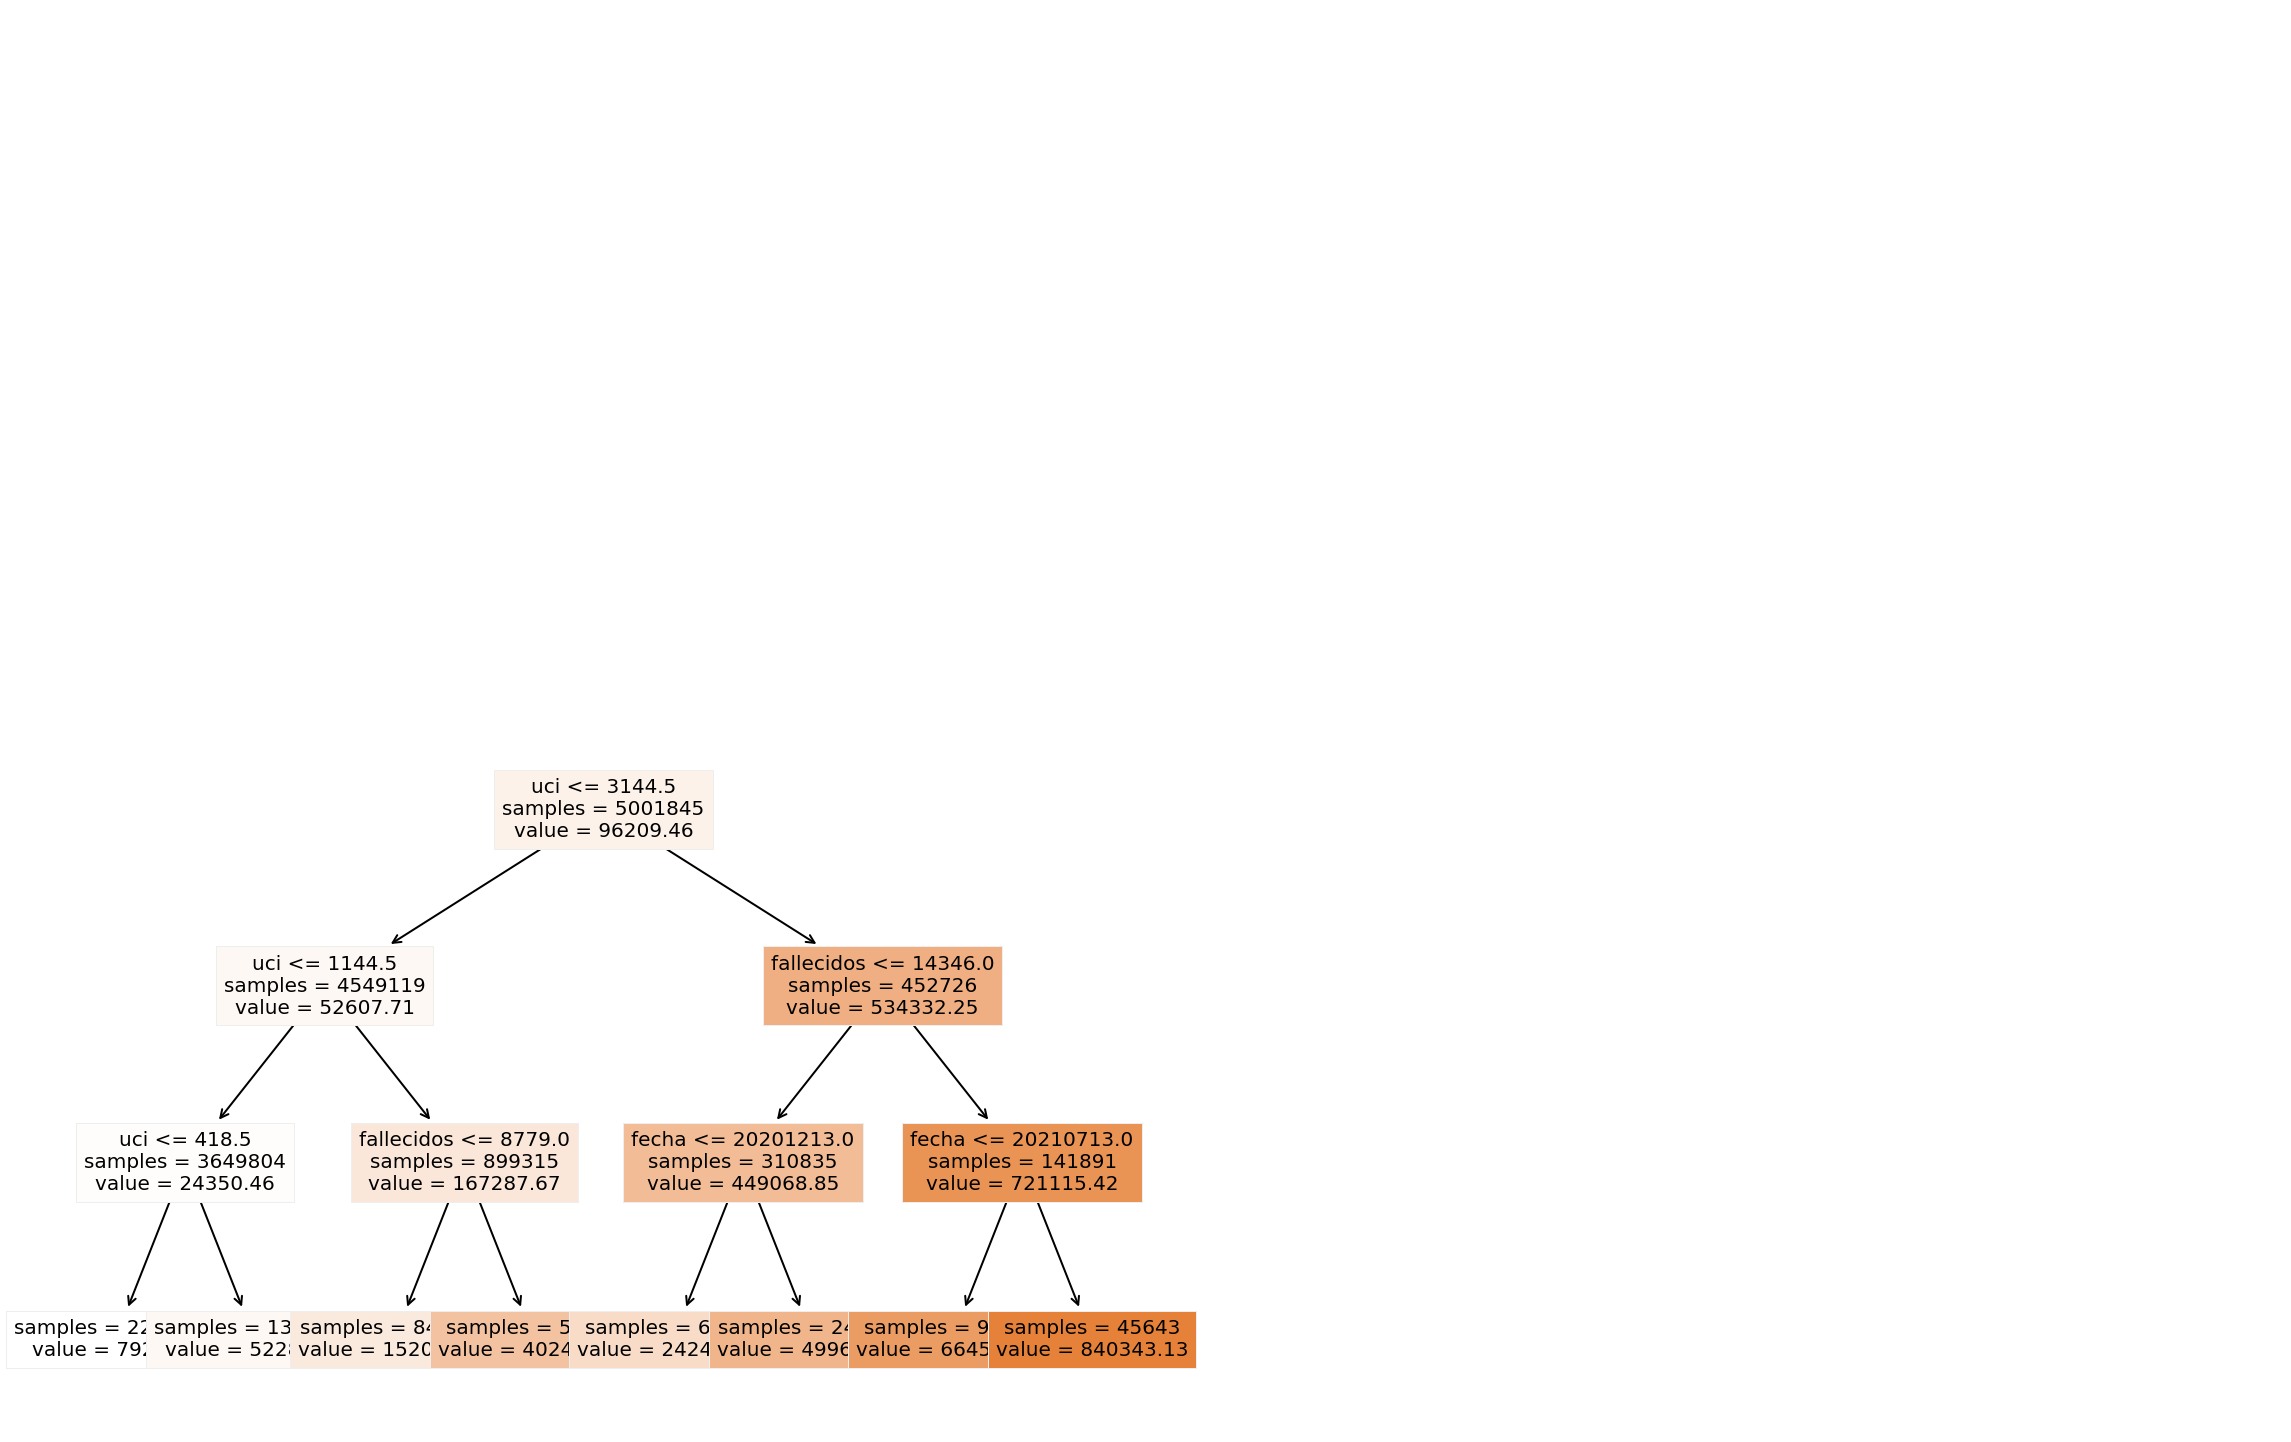

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 13))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = "confirmados").columns,
            class_names   = 'confirmados',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )
# para que aparezcan las flechas 
for o in plot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
#APLICAMOS LA FUNCION export_text
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(datos.drop(columns = "confirmados").columns)
               )
print(texto_modelo)

|--- uci <= 3144.50
|   |--- uci <= 1144.50
|   |   |--- uci <= 418.50
|   |   |   |--- value: [7928.21]
|   |   |--- uci >  418.50
|   |   |   |--- value: [52285.43]
|   |--- uci >  1144.50
|   |   |--- fallecidos <= 8779.00
|   |   |   |--- value: [152095.69]
|   |   |--- fallecidos >  8779.00
|   |   |   |--- value: [402423.28]
|--- uci >  3144.50
|   |--- fallecidos <= 14346.00
|   |   |--- fecha <= 20201213.00
|   |   |   |--- value: [242423.53]
|   |   |--- fecha >  20201213.00
|   |   |   |--- value: [499643.03]
|   |--- fallecidos >  14346.00
|   |   |--- fecha <= 20210713.00
|   |   |   |--- value: [664574.91]
|   |   |--- fecha >  20210713.00
|   |   |   |--- value: [840343.13]



In [ ]:
#VEMOS LA IMPORTANCIA QUE TIENE CADA UNO DE LOS PREDICTORES

importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "confirmados").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
10,uci,0.884453
11,fallecidos,0.082331
7,fecha,0.033217
0,average_temperature,0.000000
1,minimum_temperature,0.000000
2,maximum_temperature,0.000000
3,rainfall,0.000000
4,snowfall,0.000000
5,dew_point,0.000000
6,relative_humidity,0.000000


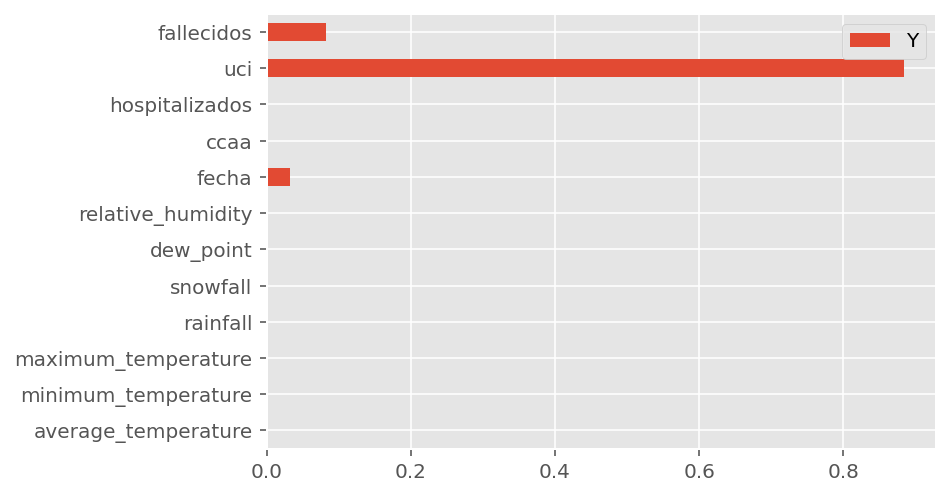

In [ ]:
df_imp = pd.DataFrame(modelo.feature_importances_.reshape(1,-1), columns=datos.drop(columns = "confirmados").columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

In [ ]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 42319.815388538205


**APLICAMOS EL ALGORITMO DE KNN**

In [ ]:
# sns:
import seaborn as sns

# Dimensiones del dataset
# ==============================================================================
df_final_1.shape

# Número de datos ausentes por variable
# ==============================================================================
df_final_1.isna().sum().sort_values()

# Ninguna variable contiene valores ausente. En el apartado imputación de valores ausentes se muestra varias estrategias de imputación cuando el set de datos está incompleto.

# vuelvo a usar los valores de fecha y ccaa como variables de tipo string
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6669127 entries, 0 to 6669126
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   average_temperature  float64
 1   minimum_temperature  float64
 2   maximum_temperature  float64
 3   rainfall             float64
 4   snowfall             float64
 5   dew_point            float64
 6   relative_humidity    float64
 7   fecha                float64
 8   ccaa                 int8   
 9   confirmados          float64
 10  hospitalizados       float64
 11  uci                  float64
 12  fallecidos           float64
dtypes: float64(12), int8(1)
memory usage: 667.8 MB


In [ ]:
import multiprocessing
import random
from itertools import product
!pip install fitter
from fitter import Fitter, get_common_distributions

distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df_final_clima.confirmados, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
expon,7.080931e-10,3222.884860,-2.453001e+08,0.293338
norm,1.293329e-09,3280.992877,-2.412826e+08,0.808973
cauchy,inf,inf,inf,inf
chi2,inf,inf,inf,inf
exponpow,inf,inf,inf,inf
gamma,inf,inf,inf,inf
powerlaw,inf,inf,inf,inf
beta,inf,inf,inf,inf
logistic,inf,inf,inf,inf


In [ ]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df_final_1.drop('confirmados', axis = 'columns'),
                                        df_final_1['confirmados'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int32']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int32']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn import svm
regressor = svm.SVR()

In [ ]:
df_final_clima.info()
df_final_clima.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11558 entries, 0 to 11557
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   average_temperature  11558 non-null  float64
 1   minimum_temperature  11558 non-null  float64
 2   maximum_temperature  11558 non-null  float64
 3   rainfall             11558 non-null  float64
 4   snowfall             11558 non-null  float64
 5   dew_point            11558 non-null  float64
 6   relative_humidity    11558 non-null  float64
 7   fecha                11558 non-null  int32  
 8   ccaa                 11558 non-null  int8   
 9   confirmados          11558 non-null  float64
 10  hospitalizados       11558 non-null  float64
 11  uci                  11558 non-null  float64
 12  fallecidos           11558 non-null  float64
dtypes: float64(11), int32(1), int8(1)
memory usage: 1.1 MB


,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,20200101,0,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,20200101,1,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,20200101,2,0.0,0.0,0.0,0.0


In [ ]:
datos = df_final_clima
datos.head(3)

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,20200101,0,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,20200101,1,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,20200101,2,0.0,0.0,0.0,0.0


**ANÁLISIS CONFIRMADOS**

In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "confirmados"),
                                        datos['confirmados'],
                                        random_state = 123
                                    )

**ARBOL DE DECISIÓN - CONFIRMADOS**

In [ ]:
regressor = DecisionTreeRegressor ()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 4328., 22833.,     0., ..., 16683.,  1570.,     0.])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 4328. 22833.     0. ... 16683.  1570.     0.]

The DataFrame generated from the NumPy array is:
             0
0       4328.0
1      22833.0
2          0.0
3      15265.0
4     608441.0
...        ...
2885       0.0
2886  334072.0
2887   16683.0
2888    1570.0
2889       0.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,4328.0
4272,21772.0,22833.0
322,0.0,0.0
10327,15276.0,15265.0
9400,606340.0,608441.0
...,...,...
897,0.0,0.0
5998,332155.0,334072.0
3949,16775.0,16683.0
2235,1563.0,1570.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 739.6058823529412
median_absolute_error (MAD): 154.0
Root Mean Squared Error (RMSE): 2057.5282497734793
mean_absolute_percentage_error (MAPE): 14025050742676.326
max_error(MAX_ERROR): 37920.0
explained_variance_score (EXPL): 0.9998148248181328
R2_SCORE: 0.9998147646780378


**KNEIGHBOURS REGRESSOR - CONFIRMADOS**

In [ ]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 4442. , 21910.8,     0. , ..., 16533.2,  1551.6,     0. ])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 4442.  21910.8     0.  ... 16533.2  1551.6     0. ]

The DataFrame generated from the NumPy array is:
             0
0       4328.0
1      22833.0
2          0.0
3      15265.0
4     608441.0
...        ...
2885       0.0
2886  334072.0
2887   16683.0
2888    1570.0
2889       0.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,4442.0
4272,21772.0,21910.8
322,0.0,0.0
10327,15276.0,15253.0
9400,606340.0,606248.0
...,...,...
897,0.0,0.0
5998,332155.0,333468.2
3949,16775.0,16533.2
2235,1563.0,1551.6


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 627.6438062283736
median_absolute_error (MAD): 79.70000000000437
Root Mean Squared Error (RMSE): 3187.4315784642345
mean_absolute_percentage_error (MAPE): 18700067656901.78
max_error(MAX_ERROR): 85957.6
explained_variance_score (EXPL): 0.9995556322846075
R2_SCORE: 0.9995554568393906


**MULTIPLE LINEAR REGRESSION - CONFIRMADOS**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([-16202.06251623,  23553.60072016, -34244.9126385 , ...,
        26809.7228766 , -11669.07369299, -45230.85390321])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[-16202.06251623  23553.60072016 -34244.9126385  ...  26809.7228766
 -11669.07369299 -45230.85390321]

The DataFrame generated from the NumPy array is:
                  0
0     -16202.062516
1      23553.600720
2     -34244.912639
3      15982.804243
4     538695.731274
...             ...
2885  -20666.267428
2886  420095.305974
2887   26809.722877
2888  -11669.073693
2889  -45230.853903

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,-16202.062516
4272,21772.0,23553.600720
322,0.0,-34244.912639
10327,15276.0,15982.804243
9400,606340.0,538695.731274
...,...,...
897,0.0,-20666.267428
5998,332155.0,420095.305974
3949,16775.0,26809.722877
2235,1563.0,-11669.073693


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 28366.626285470604
median_absolute_error (MAD): 20666.982625193894
Root Mean Squared Error (RMSE): 46586.73665781017
mean_absolute_percentage_error (MAPE): 1.1173405833622503e+19
max_error(MAX_ERROR): 308961.4682564065
explained_variance_score (EXPL): 0.9053466781418094
R2_SCORE: 0.9050364873716303


**APLICAMOS BAYESIAN RIDGE REGRESSION - CONFIRMADOS**

In [ ]:
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([-15720.15896504,  24974.99771889, -34891.38911267, ...,
        25566.0845076 , -11883.02951143, -43478.20440821])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[-15720.15896504  24974.99771889 -34891.38911267 ...  25566.0845076
 -11883.02951143 -43478.20440821]

The DataFrame generated from the NumPy array is:
                  0
0     -15720.158965
1      24974.997719
2     -34891.389113
3      14791.142062
4     538668.594666
...             ...
2885  -21700.080794
2886  419912.172397
2887   25566.084508
2888  -11883.029511
2889  -43478.204408

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,-15720.158965
4272,21772.0,24974.997719
322,0.0,-34891.389113
10327,15276.0,14791.142062
9400,606340.0,538668.594666
...,...,...
897,0.0,-21700.080794
5998,332155.0,419912.172397
3949,16775.0,25566.084508
2235,1563.0,-11883.029511


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 28322.600276305257
median_absolute_error (MAD): 20614.982643660158
Root Mean Squared Error (RMSE): 46527.24872716533
mean_absolute_percentage_error (MAPE): 1.1024902389172066e+19
max_error(MAX_ERROR): 309394.85607428104
explained_variance_score (EXPL): 0.905579596553843
R2_SCORE: 0.9052788557561458


**APLICAMOS RANDOM FOREST REGRESSOR - CONFIRMADOS**

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([4.344910e+03, 2.165079e+04, 1.000000e-02, ..., 1.656683e+04,
       1.598240e+03, 0.000000e+00])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[4.344910e+03 2.165079e+04 1.000000e-02 ... 1.656683e+04 1.598240e+03
 0.000000e+00]

The DataFrame generated from the NumPy array is:
              0
0       4344.91
1      21650.79
2          0.01
3      15267.20
4     607552.72
...         ...
2885       0.02
2886  332402.14
2887   16566.83
2888    1598.24
2889       0.00

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,4344.91
4272,21772.0,21650.79
322,0.0,0.01
10327,15276.0,15267.20
9400,606340.0,607552.72
...,...,...
897,0.0,0.02
5998,332155.0,332402.14
3949,16775.0,16566.83
2235,1563.0,1598.24


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 482.6335432525953
median_absolute_error (MAD): 76.30499999999302
Root Mean Squared Error (RMSE): 1288.889777758966
mean_absolute_percentage_error (MAPE): 26367095396231.453
max_error(MAX_ERROR): 15715.160000000003
explained_variance_score (EXPL): 0.9999273427396446
R2_SCORE: 0.9999273118275881


**APLICAMOS GRADIENT BOOSTING - CONFIRMADOS**

In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 5152.62488754, 19242.1079592 , -1281.88405181, ...,
       16199.01951494,  2355.0289023 , -1186.47521046])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 5152.62488754 19242.1079592  -1281.88405181 ... 16199.01951494
  2355.0289023  -1186.47521046]

The DataFrame generated from the NumPy array is:
                  0
0       5152.624888
1      19242.107959
2      -1281.884052
3      15669.869447
4     606173.362190
...             ...
2885   -1281.884052
2886  326042.169791
2887   16199.019515
2888    2355.028902
2889   -1186.475210

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,5152.624888
4272,21772.0,19242.107959
322,0.0,-1281.884052
10327,15276.0,15669.869447
9400,606340.0,606173.362190
...,...,...
897,0.0,-1281.884052
5998,332155.0,326042.169791
3949,16775.0,16199.019515
2235,1563.0,2355.028902


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 3911.447893546117
median_absolute_error (MAD): 2385.588203855017
Root Mean Squared Error (RMSE): 5872.615078581072
mean_absolute_percentage_error (MAPE): 6.272725930258216e+17
max_error(MAX_ERROR): 59311.42358944181
explained_variance_score (EXPL): 0.9984910574325714
R2_SCORE: 0.9984909790723788


**APLICAMOS ADA BOOST - CONFIRMADOS**

In [ ]:
regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([37978.38287865, 40013.31152529, 37978.38287865, ...,
       40013.31152529, 37978.38287865, 37978.38287865])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[37978.38287865 40013.31152529 37978.38287865 ... 40013.31152529
 37978.38287865 37978.38287865]

The DataFrame generated from the NumPy array is:
                  0
0      37978.382879
1      40013.311525
2      37978.382879
3      48802.282625
4     613160.599593
...             ...
2885   37978.382879
2886  340085.029091
2887   40013.311525
2888   37978.382879
2889   37978.382879

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,37978.382879
4272,21772.0,40013.311525
322,0.0,37978.382879
10327,15276.0,48802.282625
9400,606340.0,613160.599593
...,...,...
897,0.0,37978.382879
5998,332155.0,340085.029091
3949,16775.0,40013.311525
2235,1563.0,37978.382879


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 27657.062202960522
median_absolute_error (MAD): 32227.868032844093
Root Mean Squared Error (RMSE): 30840.992551285253
mean_absolute_percentage_error (MAPE): 1.5565180051157619e+19
max_error(MAX_ERROR): 85811.92156862744
explained_variance_score (EXPL): 0.9732728903822212
R2_SCORE: 0.9583812642166107


**APLICAMOS SUPPORT VECTOR MACHINE - CONFIRMADOS**

In [ ]:
regressor = svm.SVR()
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([24229.99860883, 24230.00067347, 24229.99803866, ...,
       24230.00055731, 24229.99836623, 24229.99802969])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[24229.99860883 24230.00067347 24229.99803866 ... 24230.00055731
 24229.99836623 24229.99802969]

The DataFrame generated from the NumPy array is:
                 0
0     24229.998609
1     24230.000673
2     24229.998039
3     24230.000023
4     24230.018228
...            ...
2885  24229.998042
2886  24230.028003
2887  24230.000557
2888  24229.998366
2889  24229.998030

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,24229.998609
4272,21772.0,24230.000673
322,0.0,24229.998039
10327,15276.0,24230.000023
9400,606340.0,24230.018228
...,...,...
897,0.0,24229.998042
5998,332155.0,24230.028003
3949,16775.0,24230.000557
2235,1563.0,24229.998366


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 79312.78984815646
median_absolute_error (MAD): 24211.498067009205
Root Mean Squared Error (RMSE): 163234.83398465818
mean_absolute_percentage_error (MAPE): 9.930498707923261e+18
max_error(MAX_ERROR): 864735.9797876196
explained_variance_score (EXPL): 9.276329981933173e-08
R2_SCORE: -0.16589079849600918


**APLICAMOS MULTILAYER PERCEPTRON REGRESSOR - CONFIRMADOS**

In [ ]:
regressor = MLPRegressor()
regressor.fit(X_train, y_train)

MLPRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([45885.74929355, 90784.97040728, 34603.59193027, ...,
       88989.12985869, 41077.51525897, 34518.53063525])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[45885.74929355 90784.97040728 34603.59193027 ... 88989.12985869
 41077.51525897 34518.53063525]

The DataFrame generated from the NumPy array is:
                  0
0      45885.749294
1      90784.970407
2      34603.591930
3      45516.326548
4     485184.902054
...             ...
2885   34511.831788
2886  586061.599280
2887   88989.129859
2888   41077.515259
2889   34518.530635

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,4381.0,45885.749294
4272,21772.0,90784.970407
322,0.0,34603.591930
10327,15276.0,45516.326548
9400,606340.0,485184.902054
...,...,...
897,0.0,34511.831788
5998,332155.0,586061.599280
3949,16775.0,88989.129859
2235,1563.0,41077.515259


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 55579.79942358434
median_absolute_error (MAD): 38138.081077868854
Root Mean Squared Error (RMSE): 77006.06644124244
mean_absolute_percentage_error (MAPE): 1.4109554804148791e+19
max_error(MAX_ERROR): 371820.67184761877
explained_variance_score (EXPL): 0.8324571841702395
R2_SCORE: 0.7405330358954998


**ANÁLISIS HOSPITALIZADOS**

In [ ]:
datos = df_final_clima
datos.head(3)

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,20200101,0,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,20200101,1,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,20200101,2,0.0,0.0,0.0,0.0


In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "hospitalizados"),
                                        datos['hospitalizados'],
                                        random_state = 123
                                    )

**ARBOL DE DECISIÓN - HOSPITALIZADOS**

In [ ]:
regressor = DecisionTreeRegressor ()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1.064e+03, 5.716e+03, 2.500e+01, ..., 5.426e+03, 6.600e+02,
       4.000e+00])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[1.064e+03 5.716e+03 2.500e+01 ... 5.426e+03 6.600e+02 4.000e+00]

The DataFrame generated from the NumPy array is:
            0
0      1064.0
1      5716.0
2        25.0
3      1104.0
4     41101.0
...       ...
2885      0.0
2886  68312.0
2887   5426.0
2888    660.0
2889      4.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,1064.0
4272,5681.0,5716.0
322,25.0,25.0
10327,1104.0,1104.0
9400,41030.0,41101.0
...,...,...
897,0.0,0.0
5998,68137.0,68312.0
3949,5438.0,5426.0
2235,660.0,660.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 65.64948096885813
median_absolute_error (MAD): 14.0
Root Mean Squared Error (RMSE): 194.04656185073202
mean_absolute_percentage_error (MAPE): 37400135313803.47
max_error(MAX_ERROR): 2890.0
explained_variance_score (EXPL): 0.9998700071849752
R2_SCORE: 0.9998699916255743


**KNEIGHBOURS REGRESSOR - HOSPITALIZADOS**

In [ ]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1.0918e+03, 5.3414e+03, 1.5000e+01, ..., 5.4378e+03, 6.5740e+02,
       3.8000e+00])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[1.0918e+03 5.3414e+03 1.5000e+01 ... 5.4378e+03 6.5740e+02 3.8000e+00]

The DataFrame generated from the NumPy array is:
            0
0      1064.0
1      5716.0
2        25.0
3      1104.0
4     41101.0
...       ...
2885      0.0
2886  68312.0
2887   5426.0
2888    660.0
2889      4.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,1091.8
4272,5681.0,5341.4
322,25.0,15.0
10327,1104.0,1103.8
9400,41030.0,50897.8
...,...,...
897,0.0,0.0
5998,68137.0,44991.8
3949,5438.0,5437.8
2235,660.0,657.4


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1263.6226297577855
median_absolute_error (MAD): 22.0
Root Mean Squared Error (RMSE): 4735.9321185502195
mean_absolute_percentage_error (MAPE): 1442710219729967.2
max_error(MAX_ERROR): 46029.0
explained_variance_score (EXPL): 0.9226685479263199
R2_SCORE: 0.9225591053887321


**MULTIPLE LINEAR REGRESSION - HOSPITALIZADOS**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([   76.14819434,  4970.82195975,  -493.28093356, ...,
        5737.58016114,  1161.66513926, -1468.48654417])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[   76.14819434  4970.82195975  -493.28093356 ...  5737.58016114
  1161.66513926 -1468.48654417]

The DataFrame generated from the NumPy array is:
                 0
0        76.148194
1      4970.821960
2      -493.280934
3      -980.644053
4     43614.515091
...            ...
2885   -827.626632
2886  63765.343682
2887   5737.580161
2888   1161.665139
2889  -1468.486544

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,76.148194
4272,5681.0,4970.821960
322,25.0,-493.280934
10327,1104.0,-980.644053
9400,41030.0,43614.515091
...,...,...
897,0.0,-827.626632
5998,68137.0,63765.343682
3949,5438.0,5737.580161
2235,660.0,1161.665139


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1734.3248393299555
median_absolute_error (MAD): 1269.8759175429586
Root Mean Squared Error (RMSE): 2532.1102843739473
mean_absolute_percentage_error (MAPE): 1.3837562408902043e+17
max_error(MAX_ERROR): 13209.951385255437
explained_variance_score (EXPL): 0.9778627200663191
R2_SCORE: 0.9778626996255819


**APLICAMOS BAYESIAN RIDGE REGRESSION - HOSPITALIZADOS**

In [ ]:
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([  143.14078358,  5074.17022928,  -484.8966927 , ...,
        5744.67951106,  1195.86363769, -1469.63378358])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[  143.14078358  5074.17022928  -484.8966927  ...  5744.67951106
  1195.86363769 -1469.63378358]

The DataFrame generated from the NumPy array is:
                 0
0       143.140784
1      5074.170229
2      -484.896693
3     -1033.005604
4     43665.771820
...            ...
2885   -882.994451
2886  63769.135357
2887   5744.679511
2888   1195.863638
2889  -1469.633784

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,143.140784
4272,5681.0,5074.170229
322,25.0,-484.896693
10327,1104.0,-1033.005604
9400,41030.0,43665.771820
...,...,...
897,0.0,-882.994451
5998,68137.0,63769.135357
3949,5438.0,5744.679511
2235,660.0,1195.863638


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1734.117054115017
median_absolute_error (MAD): 1273.582047920907
Root Mean Squared Error (RMSE): 2533.530896867716
mean_absolute_percentage_error (MAPE): 1.3918830869424184e+17
max_error(MAX_ERROR): 13243.158405246679
explained_variance_score (EXPL): 0.9778378892499233
R2_SCORE: 0.9778378528820508


**APLICAMOS RANDOM FOREST REGRESSOR - HOSPITALIZADOS**

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1.05762e+03, 5.67724e+03, 2.09200e+01, ..., 5.43640e+03,
       6.59480e+02, 3.81000e+00])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[1.05762e+03 5.67724e+03 2.09200e+01 ... 5.43640e+03 6.59480e+02
 3.81000e+00]

The DataFrame generated from the NumPy array is:
             0
0      1057.62
1      5677.24
2        20.92
3      1103.90
4     40740.93
...        ...
2885      0.07
2886  68333.09
2887   5436.40
2888    659.48
2889      3.81

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,1057.62
4272,5681.0,5677.24
322,25.0,20.92
10327,1104.0,1103.90
9400,41030.0,40740.93
...,...,...
897,0.0,0.07
5998,68137.0,68333.09
3949,5438.0,5436.40
2235,660.0,659.48


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 50.1638096885813
median_absolute_error (MAD): 7.220000000000128
Root Mean Squared Error (RMSE): 192.54369795821827
mean_absolute_percentage_error (MAPE): 292780725948224.56
max_error(MAX_ERROR): 4876.57
explained_variance_score (EXPL): 0.9998725437491802
R2_SCORE: 0.9998719976211998


**APLICAMOS GRADIENT BOOSTING - HOSPITALIZADOS**

In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1018.84263541, 5940.53851043,   42.5638348 , ..., 5579.66602117,
        746.67375634,  -14.67882103])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[1018.84263541 5940.53851043   42.5638348  ... 5579.66602117  746.67375634
  -14.67882103]

The DataFrame generated from the NumPy array is:
                 0
0      1018.842635
1      5940.538510
2        42.563835
3      1079.821008
4     40350.505941
...            ...
2885     34.643785
2886  67403.972910
2887   5579.666021
2888    746.673756
2889    -14.678821

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,1018.842635
4272,5681.0,5940.538510
322,25.0,42.563835
10327,1104.0,1079.821008
9400,41030.0,40350.505941
...,...,...
897,0.0,34.643785
5998,68137.0,67403.972910
3949,5438.0,5579.666021
2235,660.0,746.673756


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 266.5415506561748
median_absolute_error (MAD): 141.73966008186596
Root Mean Squared Error (RMSE): 471.2587670956522
mean_absolute_percentage_error (MAPE): 1.0196284095883748e+16
max_error(MAX_ERROR): 8016.167450582841
explained_variance_score (EXPL): 0.9992332438718191
R2_SCORE: 0.9992332067008296


**APLICAMOS ADA BOOST - HOSPITALIZADOS**

In [ ]:
regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([2893.98337292, 7145.89249493, 2893.98337292, ..., 7145.89249493,
       2893.98337292, 2893.98337292])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[2893.98337292 7145.89249493 2893.98337292 ... 7145.89249493 2893.98337292
 2893.98337292]

The DataFrame generated from the NumPy array is:
                 0
0      2893.983373
1      7145.892495
2      2893.983373
3      2893.983373
4     39070.899110
...            ...
2885   2893.983373
2886  66458.742268
2887   7145.892495
2888   2893.983373
2889   2893.983373

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,2893.983373
4272,5681.0,7145.892495
322,25.0,2893.983373
10327,1104.0,2893.983373
9400,41030.0,39070.899110
...,...,...
897,0.0,2893.983373
5998,68137.0,66458.742268
3949,5438.0,7145.892495
2235,660.0,2893.983373


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1602.676647653286
median_absolute_error (MAD): 1545.9833729216152
Root Mean Squared Error (RMSE): 1961.3050627562066
mean_absolute_percentage_error (MAPE): 4.780395496989816e+17
max_error(MAX_ERROR): 7242.438177874188
explained_variance_score (EXPL): 0.9897703059840605
R2_SCORE: 0.9867184206168756


**APLICAMOS SUPPORT VECTOR MACHINE - HOSPITALIZADOS**

In [ ]:
regressor = svm.SVR()
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([4355.39644073, 4355.46454276, 4355.37921004, ..., 4355.44500188,
       4355.38536686, 4355.37920994])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[4355.39644073 4355.46454276 4355.37921004 ... 4355.44500188 4355.38536686
 4355.37920994]

The DataFrame generated from the NumPy array is:
                0
0     4355.396441
1     4355.464543
2     4355.379210
3     4355.439982
4     4357.751619
...           ...
2885  4355.379220
2886  4356.679085
2887  4355.445002
2888  4355.385367
2889  4355.379210

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,4355.396441
4272,5681.0,4355.464543
322,25.0,4355.379210
10327,1104.0,4355.439982
9400,41030.0,4357.751619
...,...,...
897,0.0,4355.379220
5998,68137.0,4356.679085
3949,5438.0,4355.445002
2235,660.0,4355.385367


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 9126.450918706496
median_absolute_error (MAD): 3996.3863024732914
Root Mean Squared Error (RMSE): 18043.137317094206
mean_absolute_percentage_error (MAPE): 7.194386594823487e+17
max_error(MAX_ERROR): 104825.1977617093
explained_variance_score (EXPL): 6.166026297194094e-05
R2_SCORE: -0.12404457068202146


**APLICAMOS MULTILAYER PERCEPTRON REGRESSOR - HOSPITALIZADOS**

In [ ]:
regressor = MLPRegressor()
regressor.fit(X_train, y_train)

MLPRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([2705.55690114, 7316.31283039, 1357.511611  , ..., 7192.722934  ,
       2348.74377873, 1346.86004173])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[2705.55690114 7316.31283039 1357.511611   ... 7192.722934   2348.74377873
 1346.86004173]

The DataFrame generated from the NumPy array is:
                 0
0      2705.556901
1      7316.312830
2      1357.511611
3      2820.063993
4     58043.517065
...            ...
2885   1348.588466
2886  56184.516765
2887   7192.722934
2888   2348.743779
2889   1346.860042

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,1057.0,2705.556901
4272,5681.0,7316.312830
322,25.0,1357.511611
10327,1104.0,2820.063993
9400,41030.0,58043.517065
...,...,...
897,0.0,1348.588466
5998,68137.0,56184.516765
3949,5438.0,7192.722934
2235,660.0,2348.743779


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 3055.9904673900182
median_absolute_error (MAD): 1889.8140349276525
Root Mean Squared Error (RMSE): 4458.236432187049
mean_absolute_percentage_error (MAPE): 2.3261109330996912e+17
max_error(MAX_ERROR): 21197.797954470603
explained_variance_score (EXPL): 0.9468791057286323
R2_SCORE: 0.9313744849904972


**ANÁLISIS FALLECIDOS**

In [ ]:
datos = df_final_clima
datos.head(3)

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,20200101,0,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,20200101,1,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,20200101,2,0.0,0.0,0.0,0.0


In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "fallecidos"),
                                        datos['fallecidos'],
                                        random_state = 123
                                    )

**ARBOL DE DECISIÓN - FALLECIDOS**

In [ ]:
regressor = DecisionTreeRegressor ()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 369., 1575.,    0., ..., 1564.,  134.,    0.])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 369. 1575.    0. ... 1564.  134.    0.]

The DataFrame generated from the NumPy array is:
            0
0       369.0
1      1575.0
2         0.0
3       213.0
4     14481.0
...       ...
2885      0.0
2886  11212.0
2887   1564.0
2888    134.0
2889      0.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,369.0
4272,1578.0,1575.0
322,0.0,0.0
10327,213.0,213.0
9400,14545.0,14481.0
...,...,...
897,0.0,0.0
5998,11192.0,11212.0
3949,1564.0,1564.0
2235,134.0,134.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 27.57128027681661
median_absolute_error (MAD): 2.0
Root Mean Squared Error (RMSE): 205.92229780566265
mean_absolute_percentage_error (MAPE): 18700067656901.758
max_error(MAX_ERROR): 5177.0
explained_variance_score (EXPL): 0.9964439233146123
R2_SCORE: 0.9964399566087939


**KNEIGHBOURS REGRESSOR - FALLECIDOS**

In [ ]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 369. , 1540.2,    0. , ..., 1564. ,  132.6,    0. ])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 369.  1540.2    0.  ... 1564.   132.6    0. ]

The DataFrame generated from the NumPy array is:
            0
0       369.0
1      1575.0
2         0.0
3       213.0
4     14481.0
...       ...
2885      0.0
2886  11212.0
2887   1564.0
2888    134.0
2889      0.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,369.0
4272,1578.0,1540.2
322,0.0,0.0
10327,213.0,213.0
9400,14545.0,14542.2
...,...,...
897,0.0,0.0
5998,11192.0,11216.4
3949,1564.0,1564.0
2235,134.0,132.6


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 113.38256055363321
median_absolute_error (MAD): 2.3999999999999773
Root Mean Squared Error (RMSE): 384.41824458285805
mean_absolute_percentage_error (MAPE): 21193410011155.36
max_error(MAX_ERROR): 4531.0
explained_variance_score (EXPL): 0.9875986556544865
R2_SCORE: 0.9875932931023901


**MULTIPLE LINEAR REGRESSION - FALLECIDOS**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 584.95621719, 1118.15983043,  653.43604359, ...,  955.69142255,
        254.05285332,  796.17311739])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 584.95621719 1118.15983043  653.43604359 ...  955.69142255  254.05285332
  796.17311739]

The DataFrame generated from the NumPy array is:
                 0
0       584.956217
1      1118.159830
2       653.436044
3       592.058526
4     11299.884371
...            ...
2885    369.202385
2886  10953.095707
2887    955.691423
2888    254.052853
2889    796.173117

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,584.956217
4272,1578.0,1118.159830
322,0.0,653.436044
10327,213.0,592.058526
9400,14545.0,11299.884371
...,...,...
897,0.0,369.202385
5998,11192.0,10953.095707
3949,1564.0,955.691423
2235,134.0,254.052853


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 602.8786713369749
median_absolute_error (MAD): 383.1085734335502
Root Mean Squared Error (RMSE): 1001.5712816561073
mean_absolute_percentage_error (MAPE): 2.633167854367062e+17
max_error(MAX_ERROR): 5215.84638937359
explained_variance_score (EXPL): 0.9159460421054655
R2_SCORE: 0.9157805760207518


**APLICAMOS BAYESIAN RIDGE REGRESSION - FALLECIDOS**

In [ ]:
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 554.65595618, 1078.77348761,  644.19475695, ...,  948.66426795,
        242.32412866,  812.1729064 ])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 554.65595618 1078.77348761  644.19475695 ...  948.66426795  242.32412866
  812.1729064 ]

The DataFrame generated from the NumPy array is:
                 0
0       554.655956
1      1078.773488
2       644.194757
3       609.040498
4     11278.811571
...            ...
2885    392.559862
2886  10951.141981
2887    948.664268
2888    242.324129
2889    812.172906

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,554.655956
4272,1578.0,1078.773488
322,0.0,644.194757
10327,213.0,609.040498
9400,14545.0,11278.811571
...,...,...
897,0.0,392.559862
5998,11192.0,10951.141981
3949,1564.0,948.664268
2235,134.0,242.324129


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 603.3191971047781
median_absolute_error (MAD): 384.312921943987
Root Mean Squared Error (RMSE): 1003.2420105132161
mean_absolute_percentage_error (MAPE): 2.665966256389218e+17
max_error(MAX_ERROR): 5229.4619736255845
explained_variance_score (EXPL): 0.915663473189614
R2_SCORE: 0.9154993675187562


**APLICAMOS RANDOM FOREST REGRESSOR - FALLECIDOS**

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 369.  , 1576.74,    0.  , ..., 1564.  ,  133.13,    0.  ])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 369.   1576.74    0.   ... 1564.    133.13    0.  ]

The DataFrame generated from the NumPy array is:
             0
0       369.00
1      1576.74
2         0.00
3       213.00
4     14517.71
...        ...
2885      0.00
2886  11183.93
2887   1564.00
2888    133.13
2889      0.00

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,369.00
4272,1578.0,1576.74
322,0.0,0.00
10327,213.0,213.00
9400,14545.0,14517.71
...,...,...
897,0.0,0.00
5998,11192.0,11183.93
3949,1564.0,1564.00
2235,134.0,133.13


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 19.38335294117647
median_absolute_error (MAD): 1.4400000000000261
Root Mean Squared Error (RMSE): 116.60125429937214
mean_absolute_percentage_error (MAPE): 24154254056831.418
max_error(MAX_ERROR): 3300.67
explained_variance_score (EXPL): 0.9988589310701672
R2_SCORE: 0.998858555014867


**APLICAMOS GRADIENT BOOSTING - FALLECIDOS**

In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 290.23545331, 1566.99581925,  -29.64500795, ..., 1542.59957639,
        115.31191959,   -4.89478429])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 290.23545331 1566.99581925  -29.64500795 ... 1542.59957639  115.31191959
   -4.89478429]

The DataFrame generated from the NumPy array is:
                 0
0       290.235453
1      1566.995819
2       -29.645008
3       234.393280
4     14804.833691
...            ...
2885    -38.007375
2886  11141.379500
2887   1542.599576
2888    115.311920
2889     -4.894784

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,290.235453
4272,1578.0,1566.995819
322,0.0,-29.645008
10327,213.0,234.393280
9400,14545.0,14804.833691
...,...,...
897,0.0,-38.007375
5998,11192.0,11141.379500
3949,1564.0,1542.599576
2235,134.0,115.311920


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 113.0553752522048
median_absolute_error (MAD): 70.02316210673166
Root Mean Squared Error (RMSE): 183.07015692702822
mean_absolute_percentage_error (MAPE): 2.008048945582922e+16
max_error(MAX_ERROR): 1404.7269388042696
explained_variance_score (EXPL): 0.99718908136351
R2_SCORE: 0.9971862620535733


**APLICAMOS ADA BOOST - FALLECIDOS**

In [ ]:
regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 882.4092827 , 1377.93055556,  882.4092827 , ..., 1318.32631579,
        882.4092827 ,  882.4092827 ])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 882.4092827  1377.93055556  882.4092827  ... 1318.32631579  882.4092827
  882.4092827 ]

The DataFrame generated from the NumPy array is:
                 0
0       882.409283
1      1377.930556
2       882.409283
3       882.409283
4     14172.436866
...            ...
2885    882.409283
2886  10337.119300
2887   1318.326316
2888    882.409283
2889    882.409283

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,882.409283
4272,1578.0,1377.930556
322,0.0,882.409283
10327,213.0,882.409283
9400,14545.0,14172.436866
...,...,...
897,0.0,882.409283
5998,11192.0,10337.119300
3949,1564.0,1318.326316
2235,134.0,882.409283


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 581.5492112141717
median_absolute_error (MAD): 597.4468125401901
Root Mean Squared Error (RMSE): 669.5879034119572
mean_absolute_percentage_error (MAPE): 4.730319142438454e+17
max_error(MAX_ERROR): 2060.7837837837833
explained_variance_score (EXPL): 0.9674950916418468
R2_SCORE: 0.962358775896503


**APLICAMOS SUPPORT VECTOR MACHINE - FALLECIDOS**

In [ ]:
regressor = svm.SVR()
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([808.96845992, 809.03760503, 808.95103697, ..., 809.01820677,
       808.95737829, 808.95102769])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[808.96845992 809.03760503 808.95103697 ... 809.01820677 808.95737829
 808.95102769]

The DataFrame generated from the NumPy array is:
               0
0     808.968460
1     809.037605
2     808.951037
3     809.011416
4     811.309922
...          ...
2885  808.951035
2886  810.263185
2887  809.018207
2888  808.957378
2889  808.951028

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,808.968460
4272,1578.0,809.037605
322,0.0,808.951037
10327,213.0,809.011416
9400,14545.0,811.309922
...,...,...
897,0.0,808.951035
5998,11192.0,810.263185
3949,1564.0,809.018207
2235,134.0,808.957378


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2097.8986726338094
median_absolute_error (MAD): 801.9523198154858
Root Mean Squared Error (RMSE): 3780.9225483579967
mean_absolute_percentage_error (MAPE): 4.336532653549514e+17
max_error(MAX_ERROR): 15102.623110775125
explained_variance_score (EXPL): 0.0003124279145474418
R2_SCORE: -0.2001736897922104


**APLICAMOS MULTILAYER PERCEPTRON REGRESSOR - FALLECIDOS**

In [ ]:
regressor = MLPRegressor()
regressor.fit(X_train, y_train)

MLPRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 510.93749314, 1171.315558  ,  359.10004232, ..., 1097.51805438,
        446.86800017,  356.71357531])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 510.93749314 1171.315558    359.10004232 ... 1097.51805438  446.86800017
  356.71357531]

The DataFrame generated from the NumPy array is:
                 0
0       510.937493
1      1171.315558
2       359.100042
3       629.039009
4     10638.823584
...            ...
2885    356.403045
2886  10884.639620
2887   1097.518054
2888    446.868000
2889    356.713575

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,369.0,510.937493
4272,1578.0,1171.315558
322,0.0,359.100042
10327,213.0,629.039009
9400,14545.0,10638.823584
...,...,...
897,0.0,356.403045
5998,11192.0,10884.639620
3949,1564.0,1097.518054
2235,134.0,446.868000


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 683.3833630417583
median_absolute_error (MAD): 364.7110336388609
Root Mean Squared Error (RMSE): 1068.7599538000072
mean_absolute_percentage_error (MAPE): 1.923266669560218e+17
max_error(MAX_ERROR): 4646.808403921579
explained_variance_score (EXPL): 0.9042561384315477
R2_SCORE: 0.9041021468106589


**ANÁLISIS UCI**

In [ ]:
datos = df_final_clima
datos.head(3)

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,ccaa,confirmados,hospitalizados,uci,fallecidos
0,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,20200101,0,0.0,3.0,0.0,0.0
1,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,20200101,1,0.0,0.0,0.0,0.0
2,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,20200101,2,0.0,0.0,0.0,0.0


In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "uci"),
                                        datos['uci'],
                                        random_state = 123
                                    )

**ARBOL DE DECISIÓN - UCI**

In [ ]:
regressor = DecisionTreeRegressor ()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 77., 363.,   0., ..., 351., 110.,   0.])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 77. 363.   0. ... 351. 110.   0.]

The DataFrame generated from the NumPy array is:
           0
0       77.0
1      363.0
2        0.0
3      168.0
4     3492.0
...      ...
2885     0.0
2886  4881.0
2887   351.0
2888   110.0
2889     0.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,77.0
4272,365.0,363.0
322,0.0,0.0
10327,168.0,168.0
9400,3483.0,3492.0
...,...,...
897,0.0,0.0
5998,4873.0,4881.0
3949,351.0,351.0
2235,110.0,110.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 7.070588235294117
median_absolute_error (MAD): 1.0
Root Mean Squared Error (RMSE): 25.590845032569145
mean_absolute_percentage_error (MAPE): 7791694857042.408
max_error(MAX_ERROR): 434.0
explained_variance_score (EXPL): 0.9996507973844788
R2_SCORE: 0.9996507852477787


**KNEIGHBOURS REGRESSOR - UCI**

In [ ]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 77. , 537.8,   0. , ..., 351. , 109.8,   0. ])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[ 77.  537.8   0.  ... 351.  109.8   0. ]

The DataFrame generated from the NumPy array is:
           0
0       77.0
1      537.8
2        0.0
3      168.0
4     3483.4
...      ...
2885     0.0
2886  4879.0
2887   351.0
2888   109.8
2889     0.0

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,77.0
4272,365.0,537.8
322,0.0,0.0
10327,168.0,168.0
9400,3483.0,3483.4
...,...,...
897,0.0,0.0
5998,4873.0,4879.0
3949,351.0,351.0
2235,110.0,109.8


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 31.35660899653979
median_absolute_error (MAD): 1.2000000000000002
Root Mean Squared Error (RMSE): 90.29538845628048
mean_absolute_percentage_error (MAPE): 38335138696648.59
max_error(MAX_ERROR): 1375.0
explained_variance_score (EXPL): 0.9956529983888257
R2_SCORE: 0.9956523510549743


**MULTIPLE LINEAR REGRESSION - UCI**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([184.10690631, 468.24700844,  59.43520738, ..., 372.01836223,
        92.89898662, 147.29585241])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[184.10690631 468.24700844  59.43520738 ... 372.01836223  92.89898662
 147.29585241]

The DataFrame generated from the NumPy array is:
                0
0      184.106906
1      468.247008
2       59.435207
3      326.430126
4     3703.578600
...           ...
2885    65.978813
2886  4934.454192
2887   372.018362
2888    92.898987
2889   147.295852

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,184.106906
4272,365.0,468.247008
322,0.0,59.435207
10327,168.0,326.430126
9400,3483.0,3703.578600
...,...,...
897,0.0,65.978813
5998,4873.0,4934.454192
3949,351.0,372.018362
2235,110.0,92.898987


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 139.24436278011555
median_absolute_error (MAD): 100.13322456723836
Root Mean Squared Error (RMSE): 198.84267562947437
mean_absolute_percentage_error (MAPE): 2.487510348680587e+16
max_error(MAX_ERROR): 941.643606686499
explained_variance_score (EXPL): 0.9789166047962723
R2_SCORE: 0.978916508913104


**APLICAMOS BAYESIAN RIDGE REGRESSION - UCI**

In [ ]:
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([178.02234815, 458.55830863,  58.94400675, ..., 371.68273017,
        89.84070986, 147.00632033])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[178.02234815 458.55830863  58.94400675 ... 371.68273017  89.84070986
 147.00632033]

The DataFrame generated from the NumPy array is:
                0
0      178.022348
1      458.558309
2       58.944007
3      331.474394
4     3699.652294
...           ...
2885    71.089936
2886  4933.475931
2887   371.682730
2888    89.840710
2889   147.006320

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,178.022348
4272,365.0,458.558309
322,0.0,58.944007
10327,168.0,331.474394
9400,3483.0,3699.652294
...,...,...
897,0.0,71.089936
5998,4873.0,4933.475931
3949,351.0,371.682730
2235,110.0,89.840710


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 139.17070318217196
median_absolute_error (MAD): 99.18727176170796
Root Mean Squared Error (RMSE): 198.88010826378294
mean_absolute_percentage_error (MAPE): 2.489167407727456e+16
max_error(MAX_ERROR): 939.0567177951743
explained_variance_score (EXPL): 0.9789087080518808
R2_SCORE: 0.9789085701253689


**APLICAMOS RANDOM FOREST REGRESSOR - UCI**

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([7.7040e+01, 3.8379e+02, 0.0000e+00, ..., 3.5124e+02, 1.1032e+02,
       8.0000e-02])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[7.7040e+01 3.8379e+02 0.0000e+00 ... 3.5124e+02 1.1032e+02 8.0000e-02]

The DataFrame generated from the NumPy array is:
            0
0       77.04
1      383.79
2        0.00
3      168.00
4     3480.51
...       ...
2885     0.00
2886  4877.74
2887   351.24
2888   110.32
2889     0.08

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,77.04
4272,365.0,383.79
322,0.0,0.00
10327,168.0,168.00
9400,3483.0,3480.51
...,...,...
897,0.0,0.00
5998,4873.0,4877.74
3949,351.0,351.24
2235,110.0,110.32


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 5.2376816608996535
median_absolute_error (MAD): 0.9900000000000091
Root Mean Squared Error (RMSE): 15.123931657770983
mean_absolute_percentage_error (MAPE): 23234834063700.402
max_error(MAX_ERROR): 204.51000000000022
explained_variance_score (EXPL): 0.9998780661727639
R2_SCORE: 0.9998780300796204


**APLICAMOS GRADIENT BOOSTING - UCI**

In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([103.82967467, 395.83710899,  33.43211913, ..., 357.57346801,
        69.72855538,  55.4798817 ])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[103.82967467 395.83710899  33.43211913 ... 357.57346801  69.72855538
  55.4798817 ]

The DataFrame generated from the NumPy array is:
                0
0      103.829675
1      395.837109
2       33.432119
3      168.734258
4     3390.374184
...           ...
2885     3.182938
2886  4887.009404
2887   357.573468
2888    69.728555
2889    55.479882

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,103.829675
4272,365.0,395.837109
322,0.0,33.432119
10327,168.0,168.734258
9400,3483.0,3390.374184
...,...,...
897,0.0,3.182938
5998,4873.0,4887.009404
3949,351.0,357.573468
2235,110.0,69.728555


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 39.87805862489074
median_absolute_error (MAD): 24.216228020309472
Root Mean Squared Error (RMSE): 60.71530859452021
mean_absolute_percentage_error (MAPE): 5384462401969080.0
max_error(MAX_ERROR): 408.2491418627237
explained_variance_score (EXPL): 0.9980343032865875
R2_SCORE: 0.9980342886677332


**APLICAMOS ADA BOOST - UCI**

In [ ]:
regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([263.19522863, 590.58914729, 263.19522863, ..., 590.58914729,
       263.19522863, 263.19522863])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[263.19522863 590.58914729 263.19522863 ... 590.58914729 263.19522863
 263.19522863]

The DataFrame generated from the NumPy array is:
                0
0      263.195229
1      590.589147
2      263.195229
3      263.195229
4     3780.605846
...           ...
2885   263.195229
2886  4752.901670
2887   590.589147
2888   263.195229
2889   263.195229

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,263.195229
4272,365.0,590.589147
322,0.0,263.195229
10327,168.0,263.195229
9400,3483.0,3780.605846
...,...,...
897,0.0,263.195229
5998,4873.0,4752.901670
3949,351.0,590.589147
2235,110.0,263.195229


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 183.26456458327894
median_absolute_error (MAD): 170.88195680366175
Root Mean Squared Error (RMSE): 210.96161327601186
mean_absolute_percentage_error (MAPE): 9.474404520969133e+16
max_error(MAX_ERROR): 607.2802547770698
explained_variance_score (EXPL): 0.9816486177681412
R2_SCORE: 0.9762682260014682


**APLICAMOS SUPPORT VECTOR MACHINE - UCI**

In [ ]:
regressor = svm.SVR()
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([450.82508765, 450.89557113, 450.80730669, ..., 450.87581577,
       450.81377398, 450.80729741])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[450.82508765 450.89557113 450.80730669 ... 450.87581577 450.81377398
 450.80729741]

The DataFrame generated from the NumPy array is:
               0
0     450.825088
1     450.895571
2     450.807307
3     450.869004
4     453.210669
...          ...
2885  450.807307
2886  452.143906
2887  450.875816
2888  450.813774
2889  450.807297

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,450.825088
4272,365.0,450.895571
322,0.0,450.807307
10327,168.0,450.869004
9400,3483.0,453.210669
...,...,...
897,0.0,450.807307
5998,4873.0,452.143906
3949,351.0,450.875816
2235,110.0,450.813774


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 791.51089951832
median_absolute_error (MAD): 387.8231415732773
Root Mean Squared Error (RMSE): 1450.5101637822104
mean_absolute_percentage_error (MAPE): 1.6227994692137027e+17
max_error(MAX_ERROR): 7877.703428664183
explained_variance_score (EXPL): 0.0008114438244926081
R2_SCORE: -0.12192772511217154


**APLICAMOS MULTILAYER PERCEPTRON REGRESSOR - UCI**

In [ ]:
regressor = MLPRegressor()
regressor.fit(X_train, y_train)

MLPRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([183.69979613, 512.63384846, 109.45777172, ..., 488.08596339,
       147.86419341, 109.35800145])

In [ ]:
from numpy import random
import pandas as pd

print("NumPy Data Array is:")
print(y_pred)

print("")

data_df = pd.DataFrame(y_pred)
print("The DataFrame generated from the NumPy array is:")
print(data_df)

NumPy Data Array is:
[183.69979613 512.63384846 109.45777172 ... 488.08596339 147.86419341
 109.35800145]

The DataFrame generated from the NumPy array is:
                0
0      183.699796
1      512.633848
2      109.457772
3      207.779606
4     4073.771241
...           ...
2885   102.798854
2886  5015.844814
2887   488.085963
2888   147.864193
2889   109.358001

[2890 rows x 1 columns]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4292,77.0,183.699796
4272,365.0,512.633848
322,0.0,109.457772
10327,168.0,207.779606
9400,3483.0,4073.771241
...,...,...
897,0.0,102.798854
5998,4873.0,5015.844814
3949,351.0,488.085963
2235,110.0,147.864193


In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('median_absolute_error (MAD):', metrics.median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean_absolute_percentage_error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error(MAX_ERROR):', metrics.max_error(y_test, y_pred))
print('explained_variance_score (EXPL):', metrics.explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 155.63604248182037
median_absolute_error (MAD): 104.43689210576548
Root Mean Squared Error (RMSE): 225.80228102827274
mean_absolute_percentage_error (MAPE): 3.707091547126813e+16
max_error(MAX_ERROR): 1496.3485720238778
explained_variance_score (EXPL): 0.972820182026119
R2_SCORE: 0.9728118299534627
